In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from programs.utils.analyse_functies import *
SAVEFIGS = False

In [2]:
lvl_3_birth = pd.read_csv('datafiles/output_vectortree/huwelijk_geboorte/matches_links_exact_lvl_3_geboorte.csv', sep="|", index_col=False)
lvl_3_birth.columns = ['edit_distance', 'id_1', 'target_name_1', 'target_name_2', 'target_name_3', 'target_name_4', 'id_2', 'candidate_name_1', 'candidate_name_2', 'candidate_name_3', 'candidate_name_4']
lvl_4_birth = pd.read_csv('datafiles/output_vectortree/huwelijk_geboorte/matches_links_exact_lvl_4_geboorte.csv', sep='|', index_col=False)
lvl_4_birth.columns = ['edit_distance', 'id_1', 'target_name_1', 'target_name_2', 'target_name_3', 'target_name_4', 'id_2', 'candidate_name_1', 'candidate_name_2', 'candidate_name_3', 'candidate_name_4']
lvl_5_birth = pd.read_csv('datafiles/output_vectortree/huwelijk_geboorte/matches_links_exact_lvl_5_geboorte.csv', sep='|', index_col=False)
lvl_5_birth.columns = ['edit_distance', 'id_1', 'target_name_1', 'target_name_2', 'target_name_3', 'target_name_4', 'id_2', 'candidate_name_1', 'candidate_name_2', 'candidate_name_3', 'candidate_name_4']

In [3]:
lvl_3_mar = pd.read_csv('datafiles/output_vectortree/huwelijk_huwelijk/matches_links_exact_lvl_3_huwelijk.csv', sep="|", index_col=False)
lvl_3_mar.columns = ['edit_distance', 'id_1', 'target_name_1', 'target_name_2', 'target_name_3', 'target_name_4', 'id_2', 'candidate_name_1', 'candidate_name_2', 'candidate_name_3', 'candidate_name_4']
lvl_4_mar = pd.read_csv('datafiles/output_vectortree/huwelijk_huwelijk/matches_links_exact_lvl_4_huwelijk.csv', sep='|', index_col=False)
lvl_4_mar.columns = ['edit_distance', 'id_1', 'target_name_1', 'target_name_2', 'target_name_3', 'target_name_4', 'id_2', 'candidate_name_1', 'candidate_name_2', 'candidate_name_3', 'candidate_name_4']
lvl_5_mar = pd.read_csv('datafiles/output_vectortree/huwelijk_huwelijk/matches_links_exact_lvl_5_huwelijk.csv', sep='|', index_col=False)
lvl_5_mar.columns = ['edit_distance', 'id_1', 'target_name_1', 'target_name_2', 'target_name_3', 'target_name_4', 'id_2', 'candidate_name_1', 'candidate_name_2', 'candidate_name_3', 'candidate_name_4']

In [4]:
lvl_3_death = pd.read_csv('datafiles/output_vectortree/huwelijk_overlijden/matches_links_exact_lvl_3_overlijden.csv', sep="|", index_col=False)
lvl_3_death.columns = ['edit_distance', 'id_1', 'target_name_1', 'target_name_2', 'target_name_3', 'target_name_4', 'id_2', 'candidate_name_1', 'candidate_name_2', 'candidate_name_3', 'candidate_name_4']
lvl_4_death = pd.read_csv('datafiles/output_vectortree/huwelijk_overlijden/matches_links_exact_lvl_4_overlijden.csv', sep='|', index_col=False)
lvl_4_death.columns = ['edit_distance', 'id_1', 'target_name_1', 'target_name_2', 'target_name_3', 'target_name_4', 'id_2', 'candidate_name_1', 'candidate_name_2', 'candidate_name_3', 'candidate_name_4']
lvl_5_death = pd.read_csv('datafiles/output_vectortree/huwelijk_overlijden/matches_links_exact_lvl_5_overlijden.csv', sep='|', index_col=False)
lvl_5_death.columns = ['edit_distance', 'id_1', 'target_name_1', 'target_name_2', 'target_name_3', 'target_name_4', 'id_2', 'candidate_name_1', 'candidate_name_2', 'candidate_name_3', 'candidate_name_4']

In [5]:
lvl_3 = lvl_3_birth.append(lvl_3_mar).append(lvl_3_death)
lvl_4 = lvl_4_birth.append(lvl_4_mar).append(lvl_4_death)
lvl_5 = lvl_5_birth.append(lvl_5_mar).append(lvl_5_death)

In [6]:
lvl_5_death[['edit_distance','id_1']].groupby('edit_distance').count()

,id_1
edit_distance,
0,246288
1,80103
2,38952
3,28909
4,47584
5,114423


In [7]:
lvl_3['dist_name_1'], lvl_3['dist_name_2'], lvl_3['dist_name_3'], lvl_3['dist_name_4'] = zip(*lvl_3.apply(get_levenshtein, axis=1))
lvl_4['dist_name_1'], lvl_4['dist_name_2'], lvl_4['dist_name_3'], lvl_4['dist_name_4'] = zip(*lvl_4.apply(get_levenshtein, axis=1))
lvl_5['dist_name_1'], lvl_5['dist_name_2'], lvl_5['dist_name_3'], lvl_5['dist_name_4'] = zip(*lvl_5.apply(get_levenshtein, axis=1))


In [8]:
lvl_3_dist_3 = lvl_3[lvl_3.edit_distance == 3]
lvl_4_dist_4 = lvl_4[lvl_4.edit_distance == 4]
lvl_5_dist_5 = lvl_5[lvl_5.edit_distance == 5]

In [9]:
lvl_3_dist_3['dist'] = lvl_3_dist_3['edit_distance']
lvl_4_dist_4['dist'] = lvl_4_dist_4['edit_distance']
lvl_5_dist_5['dist'] = lvl_5_dist_5['edit_distance']

/home/wouter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/wouter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/wouter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [10]:
lvl_3_dist_3['Label'] = lvl_3_dist_3.apply(label_edit_distance_3, axis=1)
lvl_4_dist_4['Label'] = lvl_4_dist_4.apply(label_edit_distance_4, axis=1)
lvl_5_dist_5['Label'] = lvl_5_dist_5.apply(label_edit_distance_5, axis=1)

/home/wouter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/wouter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/wouter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

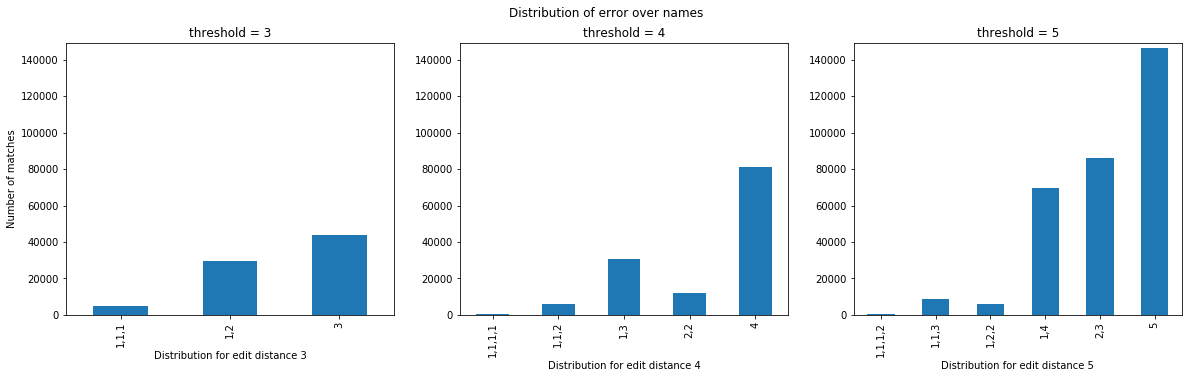

In [11]:
ylim= (0, lvl_5_dist_5[['edit_distance','Label']].groupby('Label').count().max().values[0] *1.02)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5), subplot_kw={'ylim': ylim})
fig.suptitle("Distribution of error over names")
ax = lvl_3_dist_3[['edit_distance','Label']].groupby('Label').count().plot(kind='bar', title="threshold = 3", legend=False, ax=axes[0])
ax.set_xlabel("Distribution for edit distance 3")
ax.set_ylabel("Number of matches")
#plt.savefig('reports/figures/ed_3_labels.png', bbox_inches='tight')
ax = lvl_4_dist_4[['edit_distance','Label']].groupby('Label').count().plot(kind='bar', title="threshold = 4", legend=False, ax=axes[1])
ax.set_xlabel("Distribution for edit distance 4")
ax = lvl_5_dist_5[['edit_distance','Label']].groupby('Label').count().plot(kind='bar', title="threshold = 5", legend=False, ax=axes[2])
ax.set_xlabel("Distribution for edit distance 5")
if SAVEFIGS:
    fig.savefig('reports/figures/distribution_max_error_over_names_all.png', bbox_inches='tight')
plt.show()

In [31]:
lvl_4_dist_4[['edit_distance','Label']].groupby('edit_distance').count()

,Label
edit_distance,
4,130245


In [32]:
lvl_5_dist_5[['edit_distance','Label']].groupby('edit_distance').count()

,Label
edit_distance,
5,316945


In [34]:
lvl_4[['edit_distance','id_1']].groupby('edit_distance').count()

,id_1
edit_distance,
0,787611
1,226444
2,106087
3,78154
4,130277


In [35]:
lvl_5[['edit_distance','id_1']].groupby('edit_distance').count()

,id_1
edit_distance,
0,787611
1,226444
2,106087
3,78154
4,130301
5,317287


In [18]:
label_map = {
    0: 'first name male',
    1: 'family name male',
    2: 'first name female',
    3: 'family name female'
}


In [19]:
lvl_3[['edit_distance','id_1']].groupby('edit_distance').count()

,id_1
edit_distance,
0,787611
1,226444
2,106087
3,78152


In [20]:
lvl_3.shape[0]

1198294

In [21]:
tab = lvl_3_dist_3[['edit_distance', 'Label']].groupby('Label').count()
tab['percentage'] = tab.div(tab.sum())
tab

,edit_distance,percentage
Label,,
"1,1,1",5038,0.064464
"1,2",29462,0.376983
3,43652,0.558553


In [22]:
lvl_3_samples = lvl_3_dist_3[lvl_3_dist_3.Label != '3'].sample(100)

In [23]:
lvl_3_samples.to_csv('datafiles/dataframes/working/lvl_3_samples.csv', sep="|", index=False)

In [24]:
lvl_4_samples = lvl_4_dist_4[lvl_4_dist_4.Label != '4'].sample(100)

In [25]:
lvl_4_samples.to_csv('datafiles/dataframes/working/lvl_4_samples.csv', sep="|", index=False)

In [26]:
lvl_5_samples = lvl_5_dist_5[(lvl_5_dist_5.Label != '5') & (lvl_5_dist_5.Label != '2,3')].sample(100)

In [27]:
lvl_5_samples.to_csv('datafiles/dataframes/working/lvl_5_samples.csv', sep="|", index=False)

In [28]:
lvl_3_dist_3.to_csv('datafiles/dataframes/working/lvl_3_dist_3_all.csv', sep="|", index=False)
lvl_4_dist_4[lvl_4_dist_4.Label != '4'] .to_csv('datafiles/dataframes/working/lvl_4_dist_4_all.csv', sep="|", index=False)
lvl_5_dist_5[(lvl_5_dist_5.Label != '1,4') & (lvl_5_dist_5.Label != '5')].to_csv('datafiles/dataframes/working/lvl_5_dist_5_all.csv', sep="|", index=False)

In [5]:
lvl_4_dist_4 = pd.read_csv('datafiles/dataframes/working/lvl_4_dist_4_all.csv', sep="|", index_col=False)
lvl_5_dist_5 = pd.read_csv('datafiles/dataframes/working/lvl_5_dist_5_all.csv', sep="|", index_col=False)

In [8]:
lvl_5_dist_5.groupby("Label").count()

,edit_distance,id_1,target_name_1,target_name_2,target_name_3,target_name_4,id_2,candidate_name_1,candidate_name_2,candidate_name_3,candidate_name_4,dist_name_1,dist_name_2,dist_name_3,dist_name_4,dist
Label,,,,,,,,,,,,,,,,
"1,1,1,2",537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537
"1,1,3",8559,8559,8559,8559,8559,8559,8559,8559,8559,8559,8559,8559,8559,8559,8559,8559
"1,2,2",6186,6186,6186,6186,6186,6186,6186,6186,6186,6186,6186,6186,6186,6186,6186,6186
"2,3",86006,86006,86006,86006,86006,86006,86006,86006,86006,86006,86002,86006,86006,86006,86006,86006
